<a href="https://colab.research.google.com/github/Asustuf/In_action_or_stop/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git clone https://github.com/Asustuf/In_action_or_stop

fatal: destination path 'In_action_or_stop' already exists and is not an empty directory.


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='/content/In_action_or_stop/classification_model.tflite')
interpreter.allocate_tensors()

In [14]:
# Define the input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
# Load an image from the validation folder (replace with the actual image path)
image_path = '/content/In_action_or_stop/validation/valid33.jpg'
image = Image.open(image_path).resize((224, 224))
image_array = np.array(image) / 255.0  # Normalize the image

In [22]:
# Convert image array to FLOAT32
image_array = image_array.astype(np.float32)

# Prepare the image for inference
interpreter.set_tensor(input_details[0]['index'], np.expand_dims(image_array, axis=0))

In [23]:
# Run inference
interpreter.invoke()

In [24]:
# Get the output
output = interpreter.get_tensor(output_details[0]['index'])

In [25]:
# Interpret the output (0 for 'in action', 1 for 'stop' based on your model)
if output < 0.5:
    prediction = 'in action'
else:
    prediction = 'stop'

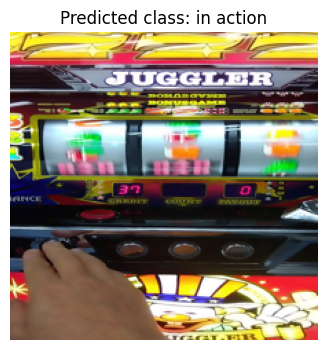

In [26]:
# Set the display size similar to a vertical video
plt.figure(figsize=(4, 4))  # Adjust the figure size as needed
plt.imshow(image)  # No need for interpolation with PIL
plt.title(f"Predicted class: {prediction}")
plt.axis('off')
plt.show()